In [7]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


remove unuseful variables

In [8]:
X = total_data[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


divide the dataset into train and test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


s2-  build a k means

In [10]:
from sklearn.cluster import KMeans

model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_unsup.fit(X_train)

KMeans(n_clusters=6, random_state=42)

insert clusters to the train dataset

In [11]:
y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


plot results

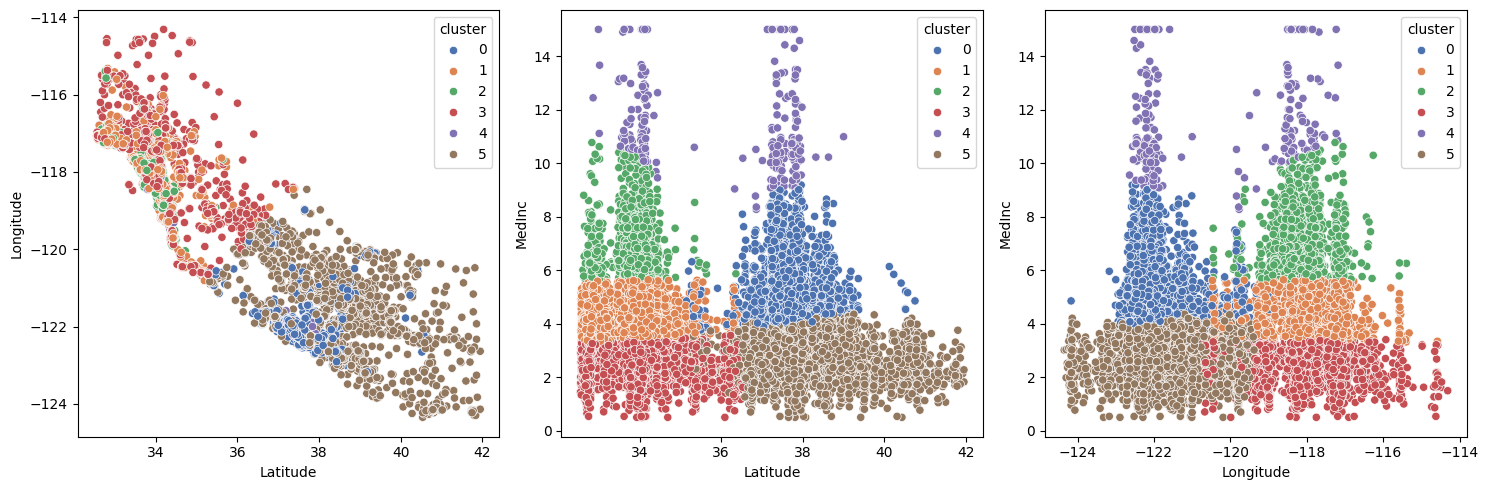

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Matplotlib backend to 'Agg' (non-interactive)
plt.switch_backend('Agg')



%matplotlib inline

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

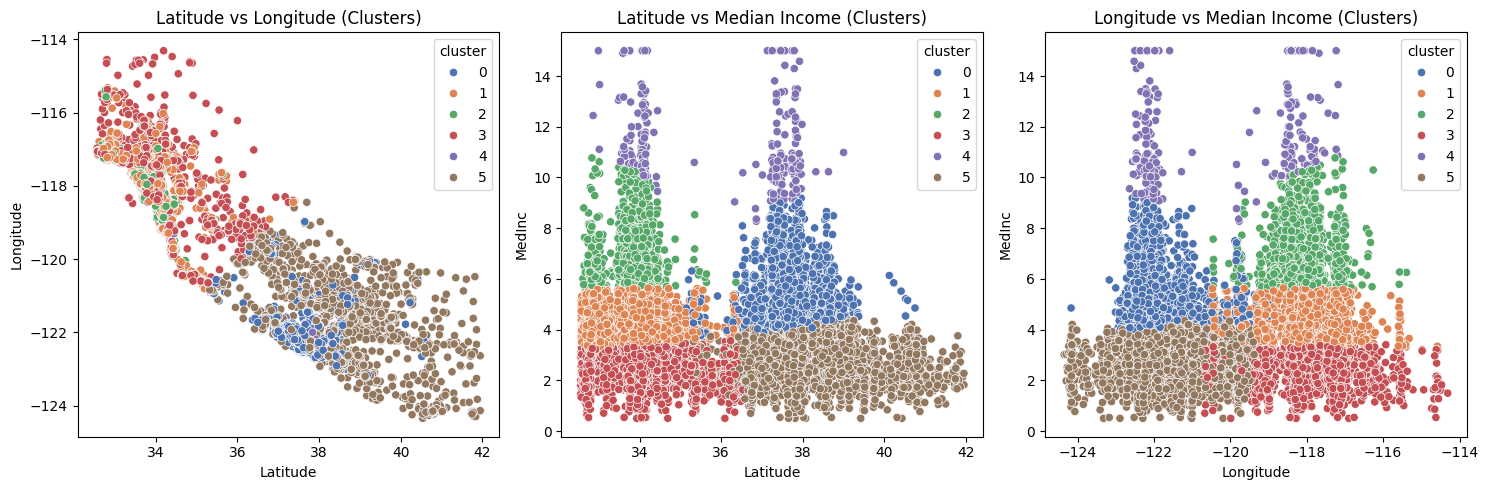

In [13]:
# Ensure inline plotting in Jupyter Notebook
%matplotlib inline

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_train is defined before proceeding
if 'X_train' not in locals():
    raise ValueError("X_train is not defined. Make sure to load your dataset before plotting.")

# Ensure 'cluster' column exists in X_train
if "cluster" not in X_train.columns:
    raise ValueError("The column 'cluster' is missing in X_train. Make sure to assign clusters before plotting.")

# Create subplots
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Scatter Plots
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="deep")
axis[0].set_title("Latitude vs Longitude (Clusters)")

sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="deep")
axis[1].set_title("Latitude vs Median Income (Clusters)")

sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="deep")
axis[2].set_title("Longitude vs Median Income (Clusters)")

# Adjust layout
plt.tight_layout()
plt.show()


train a supervised classification

In [14]:
from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3]:
import matplotlib
matplotlib.use('TkAgg')  # Alternatives: 'Qt5Agg', 'Agg', 'MacOSX'

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

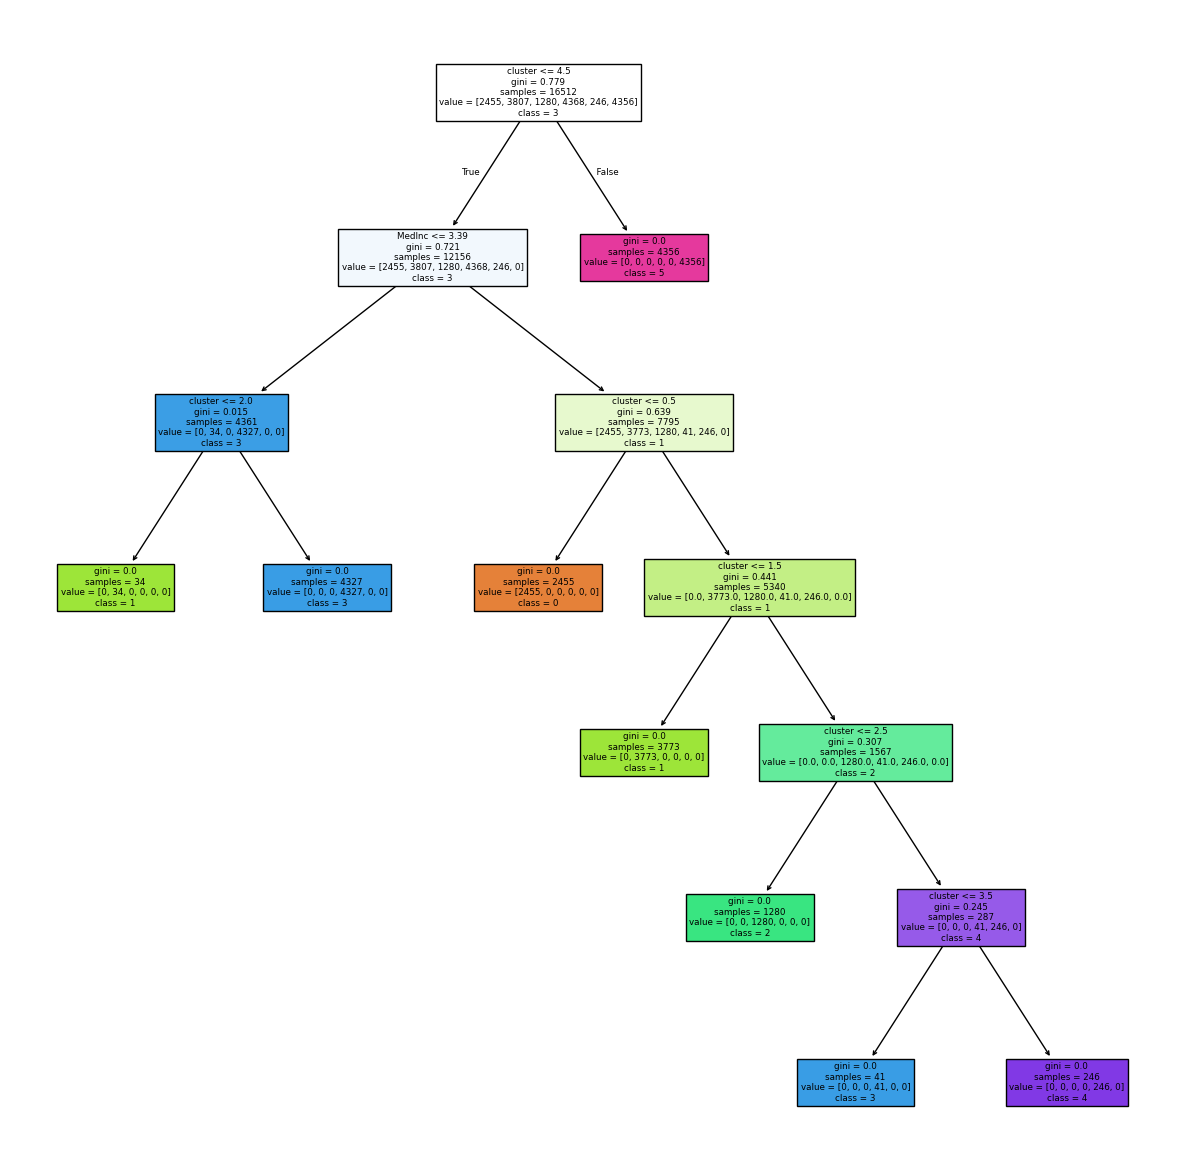

In [15]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [16]:
y_pred = model_sup.predict(X_test)
y_pred

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- cluster


In [17]:
# Ensure X_test has the same columns as X_train
X_test = X_test[X_train.columns]  

# Make predictions
y_pred = model_sup.predict(X_test)

# Print predictions
print(y_pred)


KeyError: "['cluster'] not in index"

In [18]:
print("Columns in X_train:", list(X_train.columns))
print("Columns in X_test:", list(X_test.columns))


Columns in X_train: ['MedInc', 'Latitude', 'Longitude', 'cluster']
Columns in X_test: ['MedInc', 'Latitude', 'Longitude']


In [19]:
# Ensure 'cluster' is removed from X_train to match X_test
if 'cluster' in X_train.columns:
    X_train = X_train.drop(columns=['cluster'])

# Train Decision Tree Model
model_sup = DecisionTreeClassifier(random_state=42)
model_sup.fit(X_train, y_train)

# Ensure X_test has only the columns that exist in X_train
X_test = X_test[X_test.columns.intersection(X_train.columns)]

# Make predictions
y_pred = model_sup.predict(X_test)

# Print predictions
print("Predictions:", y_pred)


Predictions: [3 3 5 ... 4 5 1]


In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

NameError: name 'y_test' is not defined

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# Drop any missing values (optional, in case of NaNs)
total_data = total_data.dropna()

# Define features (X) and target (y)
X = total_data.drop(columns=["ocean_proximity"])  # Drop categorical feature
y = total_data["median_house_value"]  # Target variable

# Convert target into categorical classes (for classification)
y = pd.qcut(y, q=6, labels=False)  # Convert house values into 6 categories

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_test has only columns that exist in X_train (Fixes KeyError)
X_test = X_test[X_test.columns.intersection(X_train.columns)]

# Train Decision Tree Model
model_sup = DecisionTreeClassifier(random_state=42)
model_sup.fit(X_train, y_train)

# Make predictions
y_pred = model_sup.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Model trained successfully!")
print(f"Model Accuracy: {accuracy:.2f}")


KeyError: "['ocean_proximity'] not found in axis"

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# Print columns to debug
print("Columns in dataset:", list(total_data.columns))

# Drop non-numeric columns (if they exist)
if 'ocean_proximity' in total_data.columns:
    total_data = total_data.drop(columns=['ocean_proximity'])

# Drop any missing values
total_data = total_data.dropna()

# Define features (X) and target (y)
X = total_data.drop(columns=["median_house_value"])  # Features
y = total_data["median_house_value"]  # Target variable

# Convert target into categorical classes (for classification)
y = pd.qcut(y, q=6, labels=False)  # Convert house values into 6 categories

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_test has only columns that exist in X_train
X_test = X_test[X_test.columns.intersection(X_train.columns)]

# Train Decision Tree Model
model_sup = DecisionTreeClassifier(random_state=42)
model_sup.fit(X_train, y_train)

# Make predictions
y_pred = model_sup.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Model trained successfully!")
print(f"Model Accuracy: {accuracy:.2f}")


Columns in dataset: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


KeyError: "['median_house_value'] not found in axis"

In [23]:
print("Columns in dataset:", list(total_data.columns))


Columns in dataset: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# Print available columns to verify correct target variable name
print("Columns in dataset:", list(total_data.columns))

# Define the correct target column name
target_col = "MedHouseVal"  # Use the correct column name

# Drop any missing values
total_data = total_data.dropna()

# Define features (X) and target (y)
X = total_data.drop(columns=[target_col])  # Features
y = total_data[target_col]  # Target variable

# Convert target into categorical classes (for classification)
y = pd.qcut(y, q=6, labels=False)  # Convert house values into 6 categories

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_test has only columns that exist in X_train (Fixes KeyError)
X_test = X_test[X_test.columns.intersection(X_train.columns)]

# Train Decision Tree Model
model_sup = DecisionTreeClassifier(random_state=42)
model_sup.fit(X_train, y_train)

# Make predictions
y_pred = model_sup.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Model trained successfully!")
print(f"Model Accuracy: {accuracy:.2f}")


Columns in dataset: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
Model trained successfully!
Model Accuracy: 0.54


In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit & transform X_train, transform X_test
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [26]:
model_sup = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10)


In [27]:
from sklearn.ensemble import RandomForestClassifier

model_sup = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=10)


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[499 140  39   8   6   5]
 [147 311 156  46  12   9]
 [ 39 128 328 150  37  17]
 [ 13  44 142 294 154  44]
 [  6  15  49 142 330 140]
 [  5   8  10  39 154 462]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       697
           1       0.48      0.46      0.47       681
           2       0.45      0.47      0.46       699
           3       0.43      0.43      0.43       691
           4       0.48      0.48      0.48       682
           5       0.68      0.68      0.68       678

    accuracy                           0.54      4128
   macro avg       0.54      0.54      0.54      4128
weighted avg       0.54      0.54      0.54      4128



In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load dataset
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# Drop missing values
total_data = total_data.dropna()

# Define target and features
target_col = "MedHouseVal"
X = total_data.drop(columns=[target_col])  # Features
y = total_data[target_col]  # Target

# Convert target into categorical classes
y = pd.qcut(y, q=6, labels=False)  # Convert house values into 6 categories

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Train optimized Random Forest model
model_sup = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=10)
model_sup.fit(X_train, y_train)

# Make predictions
y_pred = model_sup.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Model trained successfully!")
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix & Classification Report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model trained successfully!
Model Accuracy: 0.60

Confusion Matrix:
 [[549 128  12   6   0   2]
 [149 380 100  34  13   5]
 [ 30 157 322 139  46   5]
 [ 24  50 116 342 133  26]
 [  9  23  28 157 359 106]
 [  5  14   7  32 113 507]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75       697
           1       0.51      0.56      0.53       681
           2       0.55      0.46      0.50       699
           3       0.48      0.49      0.49       691
           4       0.54      0.53      0.53       682
           5       0.78      0.75      0.76       678

    accuracy                           0.60      4128
   macro avg       0.60      0.60      0.59      4128
weighted avg       0.60      0.60      0.59      4128



In [30]:
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.60


In [31]:

dump(model_unsup, open("/models/k-means_default_42.sav", "wb"))
dump(model_sup, open("/models/decision_tree_classifier_default_42.sav", "wb"))

NameError: name 'dump' is not defined

In [32]:
from joblib import dump

# Save the models
dump(model_unsup, "k-means_default_42.sav")
dump(model_sup, "decision_tree_classifier_default_42.sav")

print("Models saved successfully!")


Models saved successfully!
